# Top 5 Python Interview Questions | Multiple practical examples

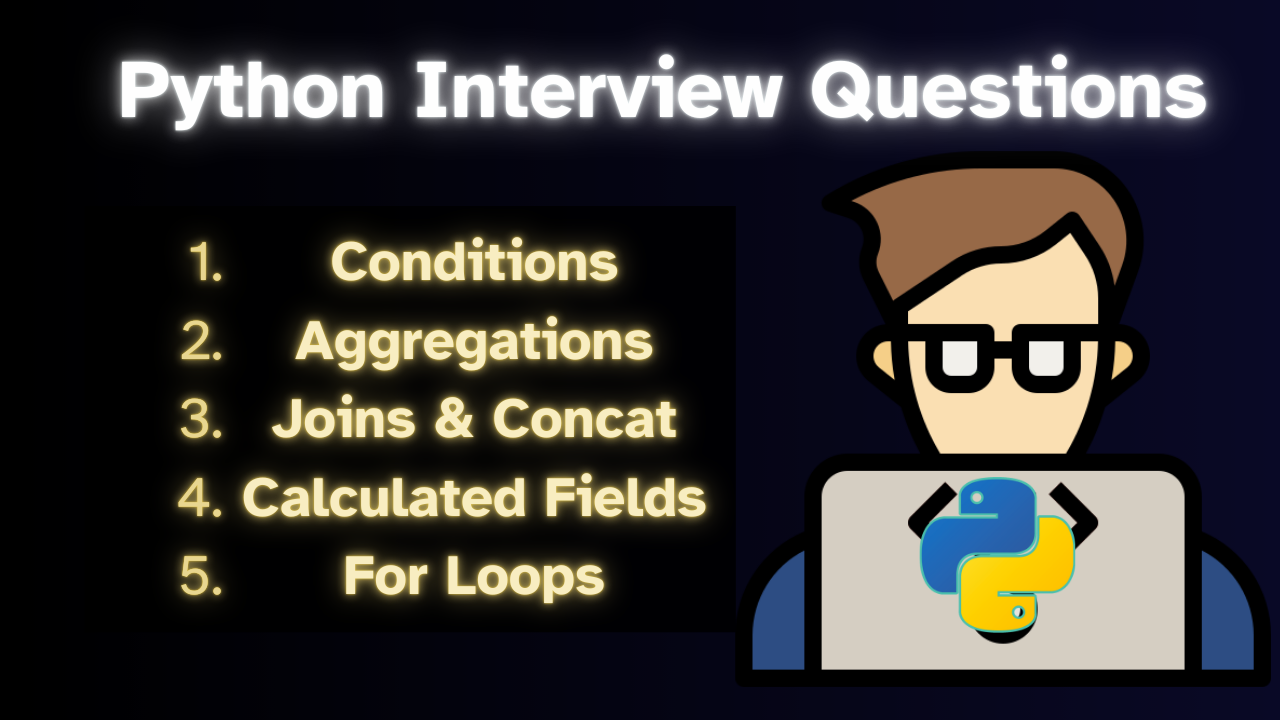

In [2]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\22. Python top 5 Questions &  Answers\\"
Image("Python Most asked Qs.png",width=900, height=700)

### Agenda:

- 0. Raw Data
- 1. Conditions 
- 2. Aggregations (SUM, AVG, COUNT, MIN & MAX)
- 3. Joins & Concat (Left, Inner, Full & Concat)
- 4. Creating new fields
- 5. For Loops

In [4]:
# Download and Install Python & Jupyter Notebooks: https://www.youtube.com/watch?v=JjFifnK3bVg&t=2631s&ab_channel=YiannisPitsillides
# Complete Python Tutorial: https://www.youtube.com/watch?v=JjFifnK3bVg&t=2631s&ab_channel=YiannisPitsillides

## 0. Raw Data - Loading the Excel data

Dataset Information: We have 3 files:
- [yt_car_main]: This table has information about cars and their retail price
- [yt_car_info]: Has additional information abour the cars
- [yt_car_used_prices]: This  table has the Used prices of the cars

In [7]:
import pandas as pd
import os
import numpy as np

# loading excel
car_data = pd.read_csv("yt_car_main.csv")
car_used_price = pd.read_csv("yt_car_used_prices.csv")
car_info = pd.read_csv("yt_car_info.csv")

# to see your directory: os.getcwd()
pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns

car_data.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,"$33,653",Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,"$35,533",Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,"$38,917",Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,"$37,037",Compact,Sedan


In [8]:
car_used_price.head()

,index,Used Price
0,0,242000
1,1,35800
2,2,37800
3,3,41400
4,4,39400


In [9]:
car_info.head()

,index,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


## 1. Conditions

In [11]:
# Top 10, last 10, =, !=, IN, NOT IN, Contains, >, <, Unique, &, |, replace, astype

# Show the Top 5 rows
car_data.head(10)

# Show the Last 5 rows
car_data.tail()

# Show the Make and Model - Top 7
car_data[['Make','Model']].head(7)

# Show all the data for 2024
car_data[car_data['Year'] == 2024]

# Show all the data where Make is not Audi
car_data[car_data['Make'] != 'Audi']['Make'].unique()

# Show all the data for BMW and Audi Cars
car_data[car_data['Make'].isin(['Audi', 'BMW'])]

# Show the Unique Models
car_data['Model'].unique()

# Show all the data excluding Models X5 and X6 Models
car_data[~car_data['Model'].isin(['X5', 'X6'])]

# Show all the cars that have more than 70k retail price OR Body Style is SUV
car_data[(car_data['Retail_Price'] > 70000) | (car_data['Body Style'] == 'SUV')]

# Show all the cars that have less than 40k retail price and Body Size is Large
car_data[(car_data['Retail_Price'] < 40000) & (car_data['Body Size'] == 'Large')]

# Show all the cars that have 'Premium' in Trim
car_data[car_data['Trim'].str.contains('Premium')]

# Make Invoice Price to be a number
car_data.dtypes
car_data['Invoice Price'] = car_data['Invoice Price'].str.replace('$', '')
car_data['Invoice Price'] = car_data['Invoice Price'].str.replace(',', '').astype(float)
car_data.dtypes

index              int64
Make              object
Model             object
Year               int64
Trim              object
Retail_Price       int64
Invoice Price    float64
Body Size         object
Body Style        object
dtype: object

In [12]:
car_data.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,33653.0,Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,35533.0,Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,38917.0,Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,37037.0,Compact,Sedan


## 2. Aggregations

In [14]:
# Total Retail Price
car_data['Retail_Price'].sum()

# # Average Retail Price
car_data['Retail_Price'].mean()

# #Min and Max retail Price
car_data['Retail_Price'].agg(['min', 'max', 'count'])

# # Number of Unique Models
car_data['Model'].nunique()

# # Average retail Price per Model
car_data.groupby(["Model"]).agg({"Retail_Price": "mean"}).reset_index()

# # Total retail Price per Make & Model
car_data.groupby(["Make", "Model"]).agg({"Retail_Price": "sum"}).reset_index()

# # Min retail Price & Count of Cars/Index per Make & Model
car_data.groupby(["Make", "Model"], as_index = False).agg({"Retail_Price": "min", "index": "count"})

# # Total Retail Price for Audi Cars
car_data['Retail_Price'][car_data['Make'] == 'Audi'].sum()

# # Total Retail Price for Audi Cars per Model
car_data[['Model','Retail_Price']][car_data['Make'] == 'Audi'].groupby(["Model"], as_index = False).agg({"Retail_Price": "sum"})

# # Show the number of cars per Make
car_data['Make'].value_counts()

Make
Ford             617
Audi             247
Mercedes-Benz    239
Nissan           200
BMW              178
Bentley           69
Aston Martin       9
Name: count, dtype: int64

# 3. Joins & Concat

In [16]:
# We will only cover the LEFT Join - which is the most common
# Complete JOINS / Concat Tutorial: https://www.youtube.com/watch?v=tMv74JmjZ_Y&t=598s&ab_channel=YiannisPitsillides 

In [17]:
car_data.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,33653.0,Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,35533.0,Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,38917.0,Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,37037.0,Compact,Sedan


In [18]:
car_used_price.head()

,index,Used Price
0,0,242000
1,1,35800
2,2,37800
3,3,41400
4,4,39400


In [19]:
car_info.head()

,index,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [20]:
# Show all the main data and Used Prices per car
car_data.merge(car_used_price, how = 'left', on = 'index')

# Show the Make, Model and Average Used Price Per Car
data2 = car_data.merge(car_used_price, how = 'left', on = 'index')
data2.groupby(['Make','Model'], as_index = False).agg({"Used Price": "mean"}).dropna()

# # Show the Make, Model, Retail Price, Cylinders & Horsepower
car_data[['index','Make','Model','Retail_Price']].merge(car_info[['index','Cylinders','Horsepower']], how = 'left', on = 'index')

# # create a master dataset that combines all 3 tables
print(car_data.shape, "car_data")
master = car_data.merge(car_used_price, how = 'left', on = 'index')
print(master.shape, "car_data")
master= master.merge(car_info, how = 'left', on = 'index')
print(master.shape, "car_data")
master.head()

(1559, 9) car_data
(1559, 10) car_data
(1559, 17) car_data


,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style,Used Price,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV,242000.0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,33653.0,Compact,Sedan,35800.0,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,35533.0,Compact,Sedan,37800.0,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,38917.0,Compact,Sedan,41400.0,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,37037.0,Compact,Sedan,39400.0,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


# 4. Creating new fields

In [22]:
# Create a new column that has a "Yes/No" if the car retail price is > than 100k
master['More_than_100k'] = np.where(master['Retail_Price'] > 100000, 'Yes', 'No')

# Create a new Torque column with just the number
master['Torque No'] = master['Torque'].str[:3].astype(float)

# Create a new field which has the Retail_price per torque
master['Retail_per_Torque'] = master['Retail_Price'] / master['Torque No'].astype(float)

master.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style,Used Price,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy,More_than_100k,Torque No,Retail_per_Torque
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV,242000.0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg,Yes,663.0,365.007541
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,33653.0,Compact,Sedan,35800.0,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg,No,221.0,161.990950
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,35533.0,Compact,Sedan,37800.0,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg,No,221.0,171.040724
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,38917.0,Compact,Sedan,41400.0,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg,No,221.0,187.330317
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,37037.0,Compact,Sedan,39400.0,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg,No,221.0,178.280543


# 5. For Loops

In [24]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [25]:
# Add the average retail price per Model in the master table

models = master['Model'].unique()
master['AVG Retail Price per Model'] = ''

for m in models:
    data  = master[master['Model']== m]
    avg_retail_price = data['Retail_Price'].mean()
    print(m, avg_retail_price)
    master['AVG Retail Price per Model'][master['Model']==m] = avg_retail_price


DBX707 239000.0
A3 38350.0
A4 46675.0
A4 allroad 49950.0
A5 54000.0
A6 63380.0
A6 allroad 71300.0
A7 75700.0
A8 89350.0
Q3 39825.0
Q4 Sportback e-tron 62344.444444444445
Q4 e-tron 57246.153846153844
Q5 54972.22222222222
Q5 Sportback 55550.0
Q7 66240.0
Q8 77750.0
Q8 Sportback e-tron 82733.33333333333
Q8 e-tron 79333.33333333333
RS 3 61600.0
RS 5 78900.0
RS 6 123850.0
RS 7 125850.0
RS Q8 125800.0
RS e-tron GT 145500.0
S3 50300.0
S4 57416.666666666664
S5 63250.0
S6 78933.33333333333
S7 88300.0
S8 121950.0
SQ5 61616.666666666664
SQ5 Sportback 64350.0
SQ7 92600.0
SQ8 99300.0
SQ8 Sportback e-tron 95600.0
SQ8 e-tron 92800.0
e-tron GT 109300.0
2 Series 44900.0
2 Series Gran Coupe 41450.0
3 Series 49800.0
4 Series 59300.0
4 Series Gran Coupe 54175.0
5 Series 61540.0
7 Series 105166.66666666667
8 Series 100041.66666666667
8 Series Gran Coupe 95216.66666666667
ALPINA B8 Gran Coupe 147100.0
ALPINA XB7 147200.0
M2 62700.0
M3 78466.66666666667
M3 CS 118700.0
M4 83200.0
M8 141350.0
M8 Gran Coupe 1364

In [26]:
master.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style,Used Price,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy,More_than_100k,Torque No,Retail_per_Torque,AVG Retail Price per Model
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV,242000.0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg,Yes,663.0,365.007541,239000.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,33653.0,Compact,Sedan,35800.0,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg,No,221.0,161.990950,38350.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,35533.0,Compact,Sedan,37800.0,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg,No,221.0,171.040724,38350.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,38917.0,Compact,Sedan,41400.0,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg,No,221.0,187.330317,38350.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,37037.0,Compact,Sedan,39400.0,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg,No,221.0,178.280543,38350.0
